In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import datetime
import scipy.stats as stats

In [2]:
sns.set_style('whitegrid')


# Overview of Notebook

## Data

The data is from Keggle and consists of daily usage from the website Udacity, which is an online learning company. The data consists of different users and their daily usage between November 2014 and August 2015. 

The different fields in the dataset are the date they signed in, how many courses they viewed, the number of lessons complete, the number of projects complete, how long they spent in the website, and their account number. 

The data was clean and did not need any wrangling or cleaning to work with.

## Exploration

This is where I found that the data starts in November 2014 and ends in August 2015. Because I don't have each users `start date`, and just their most recent, later on in my analysis, I will have to make some decisions about those whos first sign in is in November. Namely that If they signed in in November, then I can't assume that they started using the product in this month. 

**Results**
I then wanted to see if there were any correlations between the total numbers for each user. I did this by performing a group by and summing each column. I found that everything had very strong correlations with one another, which makes sense. If you're spending more *time* in the app, then you're likely to copmlete more lessons and projects. 

I wanted to see what the mean/median were for how user's behaviors throughout their lifetime (of this 9 month period), and found that most people actually did *not* complete a project throughout their entire time using Udacity. 

- About 30% of users do not even go on to finish a lesson
- 70% of all users do not go on to finish a project
- number of sign-ins from unique users would peak in the middle of the month, but then decrease ones more, before peaking again
    - Monthly usage consistently increased each month. 
    - Peaked in July 2015 before leveling off
- July also saw the highest number of minutes logged and the highest number of lessons completed
    - This is not very strong, as I don't know how long a lesson takes to finish, or when they started the lesson

## Measuring Retention 

For retention, there are two definitions that you need to know
- cohort: The group whose retention is being analyzed
    - For purposes of this anaylsis, we'll be examining cohorts as people who started using it in each month
- n-week: means retention is being recorded weekly.
    - Ex: 50 people used in January with different start dates. 25 people signed back in between 7-14 days later. 
        - 25/50 = 0.5. This means January has 50% 1-week retention. 
        
I am choosing n-week retention because Udacity is not a main source of education, meaning some people will not and are not expected to sign in every single day, but rather at least once a week. 

**Results**
- November was the largest cohort, because incomplete data

I found that those from the May cohort had the highest retention metrics, and those in December had the lowest. Overall, Udacity had very high retention metrics in general, at about 70-80% of users coming back 2 weeks later. For a web application, this is really high. This could be because of the nature of the courses (paid/unpaid, or signing up with email)

### Usage Impact

In this section, I wanted to see which feature might have the strongest impact on retention. Because retention is so high at Udacity, I decided to see the differences at 2 month retention. 

To determine this, I sum up how much each of the users perform each event in their first two weeks of usage. After this, I see if people who stay for longer than two months have different behaviors than those who don't stay on for two months. 

**Results**
- The average number of completed lessons for users who stay for two months is greater than that of the users who don't. This is with statistical significance. 
- At 95% confidence, completing even 1 lesson in their first two weeks of use will increase their likelihood of remaining for 2 months by 1.7x
- 




In [3]:
engagement = pd.read_csv('daily_engagement.csv')

In [4]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136240 entries, 0 to 136239
Data columns (total 6 columns):
acct                     136240 non-null int64
utc_date                 136240 non-null object
num_courses_visited      136240 non-null float64
total_minutes_visited    136240 non-null float64
lessons_completed        136240 non-null float64
projects_completed       136240 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 6.2+ MB


In [5]:
engagement['utc_date'] = pd.to_datetime(engagement['utc_date'])


In [6]:
# adding columns for the year, month and day for different analyses. 

engagement['year'] = pd.DatetimeIndex(engagement['utc_date']).year
engagement['month'] = pd.DatetimeIndex(engagement['utc_date']).month
engagement['day'] = pd.DatetimeIndex(engagement['utc_date']).day


In [7]:
engagement.head(10)

,acct,utc_date,num_courses_visited,total_minutes_visited,lessons_completed,projects_completed,year,month,day
0,0,2015-01-09,1.0,11.679374,0.0,0.0,2015,1,9
1,0,2015-01-10,2.0,37.284887,0.0,0.0,2015,1,10
2,0,2015-01-11,2.0,53.633746,0.0,0.0,2015,1,11
3,0,2015-01-12,1.0,33.489270,0.0,0.0,2015,1,12
4,0,2015-01-13,1.0,64.779678,0.0,0.0,2015,1,13
5,0,2015-01-14,1.0,151.617577,1.0,0.0,2015,1,14
6,0,2015-01-15,1.0,142.395964,0.0,0.0,2015,1,15
7,0,2015-01-16,0.0,0.000000,0.0,0.0,2015,1,16
8,0,2015-01-17,1.0,9.849562,0.0,0.0,2015,1,17
9,0,2015-01-18,1.0,38.330548,0.0,0.0,2015,1,18


In [8]:
engagement.acct.nunique()

1237

About 9 months of data

## Exploration

In [9]:
engagement.utc_date.min()

Timestamp('2014-11-05 00:00:00')

In [10]:
engagement.utc_date.max()

Timestamp('2015-08-27 00:00:00')

Data is partial. Most of the users' first login dates are in November, which is when the data first starts recording.

C:\Users\miste\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


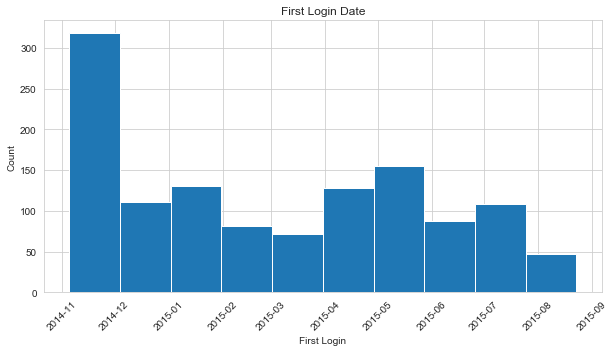

In [11]:
fig, ax = plt.subplots(figsize = (10,5))

_ = engagement.groupby('acct').utc_date.min().hist(xrot = 45)
_ = plt.title("First Login Date")
_ = plt.ylabel('Count')
_ = plt.xlabel('First Login')

Udacity has a very high retention rate, just by looking at what day each user was seen to use it last. 

This data ends in August 2015, and most of the users' final days are seen in August, meaning, regardless of when they started, they continued using it up until the data stopped recording.

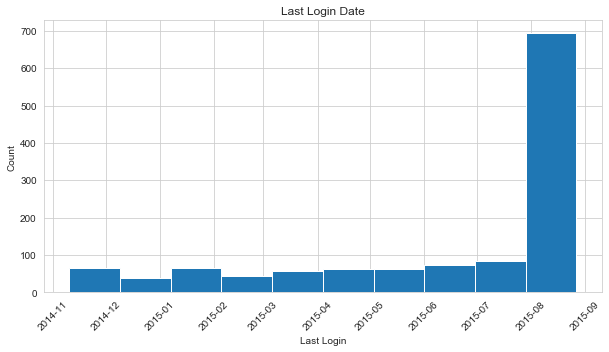

In [12]:
fig, ax = plt.subplots(figsize = (10,5))


_ = engagement.groupby('acct').utc_date.max().hist(xrot = 45)
_ = plt.title("Last Login Date")
_ = plt.ylabel('Count')
_ = plt.xlabel('Last Login')

For people who stop logging in. Why?

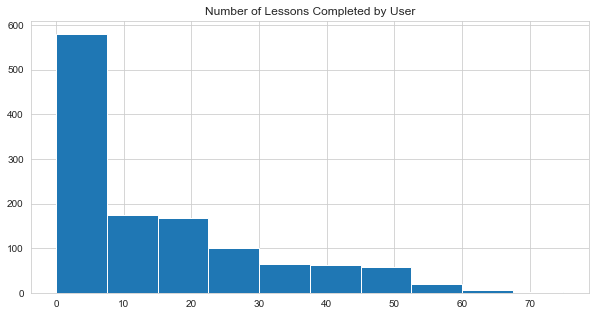

In [13]:
fig, ax = plt.subplots(figsize = (10,5))


_ = engagement.groupby('acct').lessons_completed.sum().hist()
_ = plt.title("Number of Lessons Completed by User")

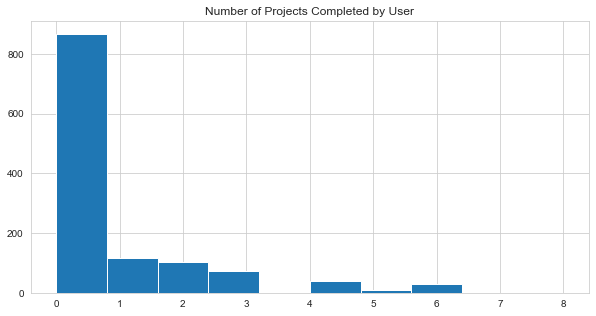

In [14]:
fig, ax = plt.subplots(figsize = (10,5))

_ = engagement.groupby('acct').projects_completed.sum().hist()
_ = plt.title("Number of Projects Completed by User")

In [15]:
completions = engagement.groupby('acct').sum()[['total_minutes_visited','lessons_completed','projects_completed']]

In [16]:
completions

,total_minutes_visited,lessons_completed,projects_completed
acct,,,
0,7605.371411,40.0,2.0
1,4296.244476,23.0,0.0
2,2977.430045,9.0,0.0
3,4422.018919,42.0,2.0
4,3722.648850,18.0,0.0
...,...,...,...
1300,13.387217,0.0,0.0
1301,6.202126,0.0,0.0
1302,0.000000,0.0,0.0


In [17]:
count = engagement.groupby('acct').count().utc_date.reset_index().rename(mapper = {'utc_date':'count'},axis = 1).set_index('acct')

In [18]:
with_count = completions.merge(count, left_index = True, right_index = True)

Strong correlation between # of Lessons completed and # of projects completed.

Total minutes correlates with the total number of lessons completed, but not necessarily with number of projects copmleted.

In [19]:
with_count.corr()

,total_minutes_visited,lessons_completed,projects_completed,count
total_minutes_visited,1.000000,0.865918,0.696726,0.694027
lessons_completed,0.865918,1.000000,0.759943,0.684535
projects_completed,0.696726,0.759943,1.000000,0.638684
count,0.694027,0.684535,0.638684,1.000000


Correlation Plot between the **total** number of minutes, projects, lessons and number of sessions. 

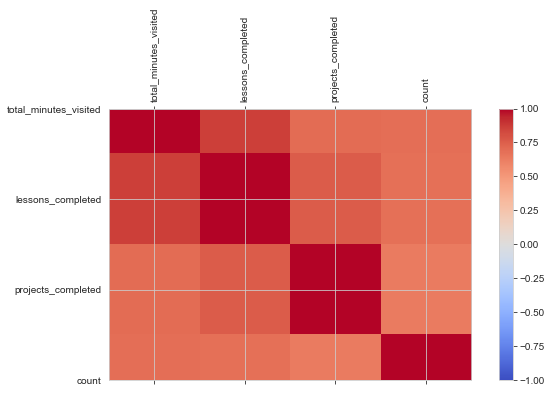

In [20]:
corr = with_count.corr()
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(with_count.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(with_count.columns)
ax.set_yticklabels(with_count.columns)
plt.show()

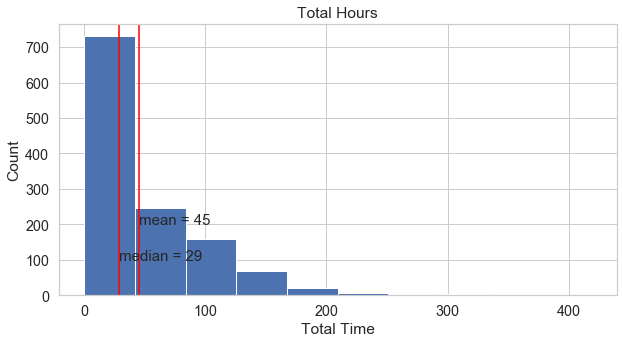

In [21]:
sns.set(font_scale = 1.3, style = 'whitegrid')

_ = plt.title('Total Hours')

_ = (with_count.total_minutes_visited/60).plot(kind = 'hist', figsize = (10,5))
_ = plt.ylabel('Count')
_ = plt.xlabel('Total Time')

_ = plt.axvline(with_count['total_minutes_visited'].mean()/60, color = 'red') 
_ = plt.text(x = with_count['total_minutes_visited'].mean()/60, y = 200, s = 'mean = {}'.format(round(with_count['total_minutes_visited'].mean()/60)), size = 15)

_ = plt.axvline(with_count['total_minutes_visited'].median()/60, color = 'red')
_ = plt.text(x = with_count['total_minutes_visited'].median()/60, y = 100, s = 'median = {}'.format(round(with_count['total_minutes_visited'].median()/60)), size = 15)

In [22]:
(len(with_count[with_count.lessons_completed == 0])/len(with_count))*100

29.102667744543247

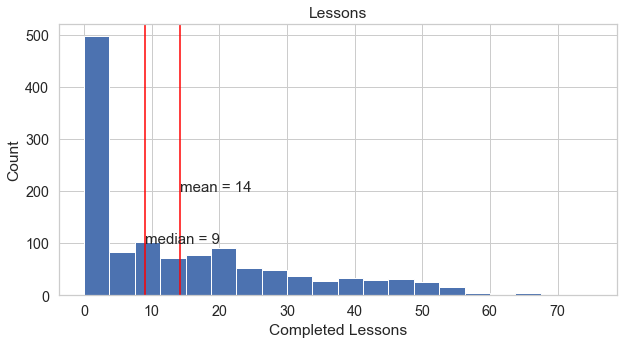

In [23]:
sns.set(font_scale = 1.3, style = 'whitegrid')

_ = plt.title('Lessons')

_ = with_count.lessons_completed.plot(kind = 'hist', figsize = (10,5), bins = 20)
_ = plt.ylabel('Count')
_ = plt.xlabel('Completed Lessons')

_ = plt.axvline(with_count['lessons_completed'].mean(), color = 'red') 
_ = plt.text(x = with_count['lessons_completed'].mean(), y = 200, s = 'mean = {}'.format(round(with_count['lessons_completed'].mean())), size = 15)

_ = plt.axvline(with_count['lessons_completed'].median(), color = 'red')
_ = plt.text(x = with_count['lessons_completed'].median(), y = 100, s = 'median = {}'.format(round(with_count['lessons_completed'].median())), size = 15)

In [24]:
(len(with_count[with_count.projects_completed == 0])/len(with_count))*100

70.08892481810832

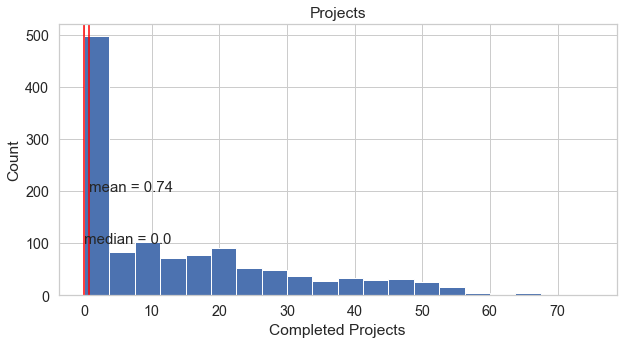

In [25]:
sns.set(font_scale = 1.3, style = 'whitegrid')

_ = plt.title('Projects')

_ = with_count.lessons_completed.plot(kind = 'hist', figsize = (10,5), bins = 20)
_ = plt.ylabel('Count')
_ = plt.xlabel('Completed Projects')

_ = plt.axvline(with_count['projects_completed'].mean(), color = 'red') 
_ = plt.text(x = with_count['projects_completed'].mean(), y = 200, s = 'mean = {}'.format(round(with_count['projects_completed'].mean(),2)), size = 15)

_ = plt.axvline(with_count['projects_completed'].median(), color = 'red')
_ = plt.text(x = with_count['projects_completed'].median(), y = 100, s = 'median = {}'.format(round(with_count['projects_completed'].median(),2)), size = 15)

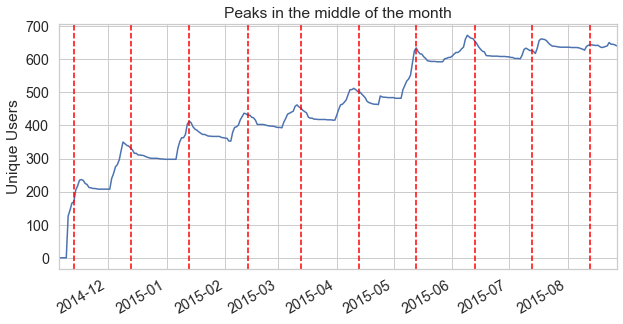

In [26]:
fig, ax = plt.subplots(figsize = (10,5))

_ = engagement.groupby('utc_date').nunique().acct.plot()
_ = plt.ylabel('Unique Users')
_ = plt.title('Peaks in the middle of the month')
_ = plt.xlabel("")

for month in ['11','12']:
    _ = plt.axvline('2014-{}-13'.format(month), color = 'red', linestyle = '--') 
    
for month in ['01','02','03','04','05','06','07','08']:
    _ = plt.axvline('2015-{}-13'.format(month), color = 'red', linestyle = '--') 



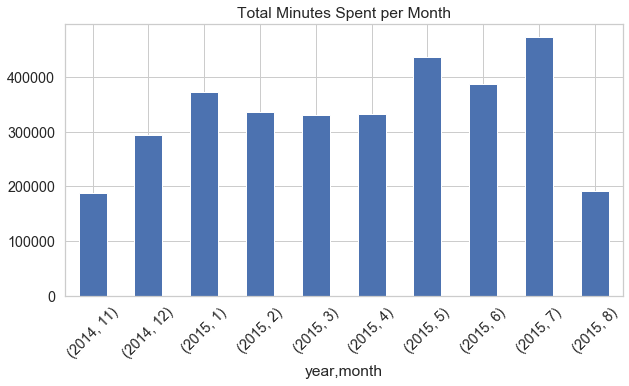

In [27]:
fig, ax = plt.subplots(figsize = (10,5))

engagement.groupby(['year','month']).sum().total_minutes_visited.plot(kind = 'bar',rot = 45)
_ = plt.title('Total Minutes Spent per Month')

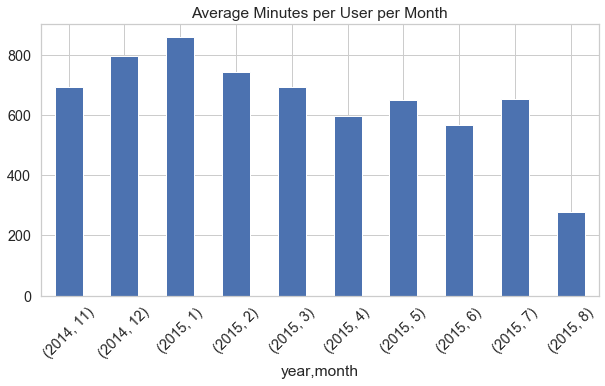

In [28]:
fig, ax = plt.subplots(figsize = (10,5))

_ = engagement.groupby(['year','month','acct']).sum().groupby(['year','month']).mean().total_minutes_visited.plot(kind = 'bar',rot = 45)

_ = plt.title('Average Minutes per User per Month')

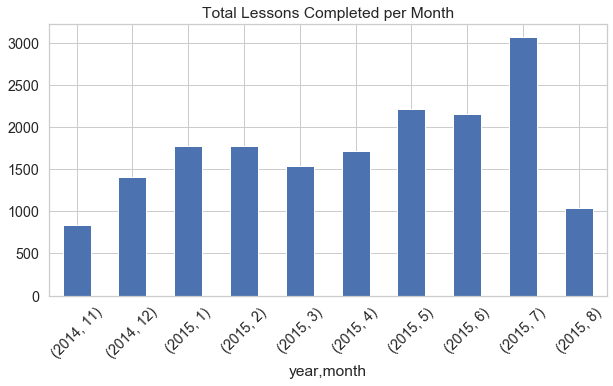

In [29]:
fig, ax = plt.subplots(figsize = (10,5))

engagement.groupby(['year','month']).sum().lessons_completed.plot(kind = 'bar',rot = 45)
_ = plt.title('Total Lessons Completed per Month')

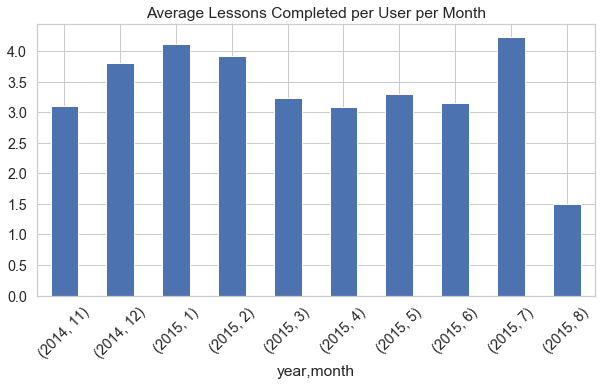

In [30]:
fig, ax = plt.subplots(figsize = (10,5))

_ = engagement.groupby(['year','month','acct']).sum().groupby(['year','month']).mean().lessons_completed.plot(kind = 'bar',rot = 45)

_ = plt.title('Average Lessons Completed per User per Month')

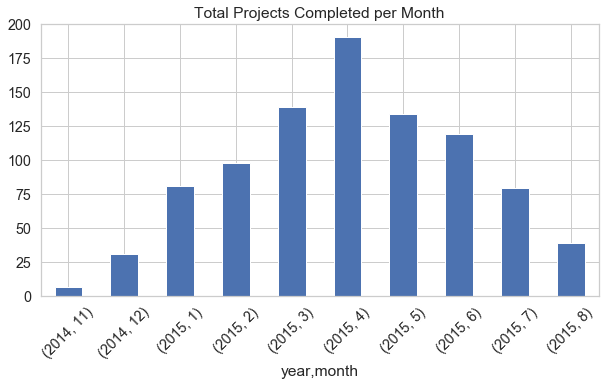

In [31]:
fig, ax = plt.subplots(figsize = (10,5))

engagement.groupby(['year','month']).sum().projects_completed.plot(kind = 'bar',rot = 45)
_ = plt.title('Total Projects Completed per Month')

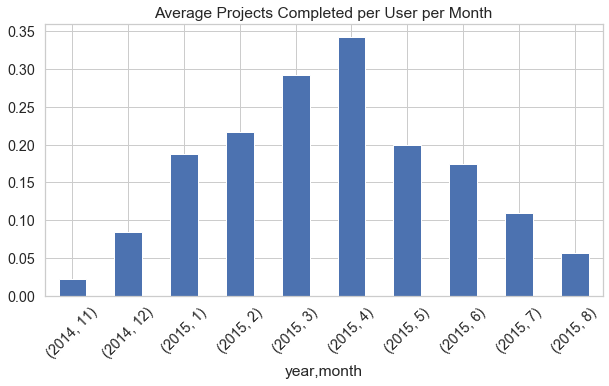

In [32]:
fig, ax = plt.subplots(figsize = (10,5))

_ = engagement.groupby(['year','month','acct']).sum().groupby(['year','month']).mean().projects_completed.plot(kind = 'bar',rot = 45)

_ = plt.title('Average Projects Completed per User per Month')

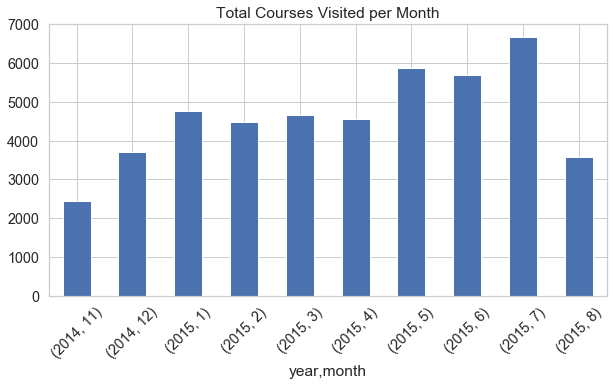

In [33]:
fig, ax = plt.subplots(figsize = (10,5))

engagement.groupby(['year','month']).sum().num_courses_visited.plot(kind = 'bar',rot = 45)
_ = plt.title('Total Courses Visited per Month')

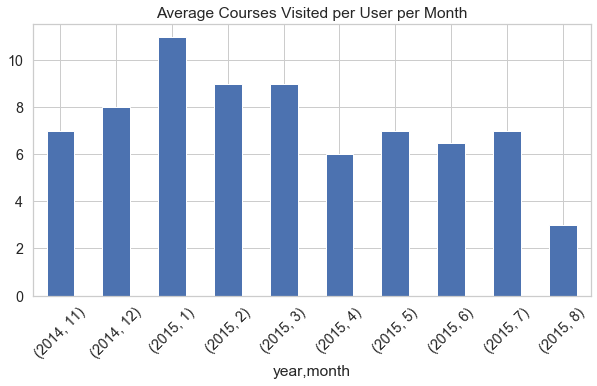

In [34]:
fig, ax = plt.subplots(figsize = (10,5))

_ = engagement.groupby(['year','month','acct']).sum().groupby(['year','month']).median().num_courses_visited.plot(kind = 'bar',rot = 45)

_ = plt.title('Average Courses Visited per User per Month')

## Retention

In [35]:
first_day = engagement.groupby('acct').utc_date.min().reset_index().rename(mapper = {'utc_date':'first_day'}, axis = 1)

In [36]:
with_first = engagement.merge(first_day, on = 'acct')

In [37]:
with_first 

,acct,utc_date,num_courses_visited,total_minutes_visited,lessons_completed,projects_completed,year,month,day,first_day
0,0,2015-01-09,1.0,11.679374,0.0,0.0,2015,1,9,2015-01-09
1,0,2015-01-10,2.0,37.284887,0.0,0.0,2015,1,10,2015-01-09
2,0,2015-01-11,2.0,53.633746,0.0,0.0,2015,1,11,2015-01-09
3,0,2015-01-12,1.0,33.489270,0.0,0.0,2015,1,12,2015-01-09
4,0,2015-01-13,1.0,64.779678,0.0,0.0,2015,1,13,2015-01-09
...,...,...,...,...,...,...,...,...,...,...
136235,1305,2015-06-14,0.0,0.000000,0.0,0.0,2015,6,14,2015-05-12
136236,1305,2015-06-15,0.0,0.000000,0.0,0.0,2015,6,15,2015-05-12
136237,1305,2015-06-16,1.0,2.720136,0.0,0.0,2015,6,16,2015-05-12
136238,1305,2015-06-17,0.0,0.000000,0.0,0.0,2015,6,17,2015-05-12


In [38]:
d = datetime.timedelta(days = 7)


In [39]:
with_first['WeeksOut'] = [math.floor(x) for x in (with_first.utc_date - with_first.first_day)/d]

In [40]:
with_first

,acct,utc_date,num_courses_visited,total_minutes_visited,lessons_completed,projects_completed,year,month,day,first_day,WeeksOut
0,0,2015-01-09,1.0,11.679374,0.0,0.0,2015,1,9,2015-01-09,0
1,0,2015-01-10,2.0,37.284887,0.0,0.0,2015,1,10,2015-01-09,0
2,0,2015-01-11,2.0,53.633746,0.0,0.0,2015,1,11,2015-01-09,0
3,0,2015-01-12,1.0,33.489270,0.0,0.0,2015,1,12,2015-01-09,0
4,0,2015-01-13,1.0,64.779678,0.0,0.0,2015,1,13,2015-01-09,0
...,...,...,...,...,...,...,...,...,...,...,...
136235,1305,2015-06-14,0.0,0.000000,0.0,0.0,2015,6,14,2015-05-12,4
136236,1305,2015-06-15,0.0,0.000000,0.0,0.0,2015,6,15,2015-05-12,4
136237,1305,2015-06-16,1.0,2.720136,0.0,0.0,2015,6,16,2015-05-12,5
136238,1305,2015-06-17,0.0,0.000000,0.0,0.0,2015,6,17,2015-05-12,5


In [41]:
with_first['cohort'] = pd.DatetimeIndex(with_first['first_day']).month


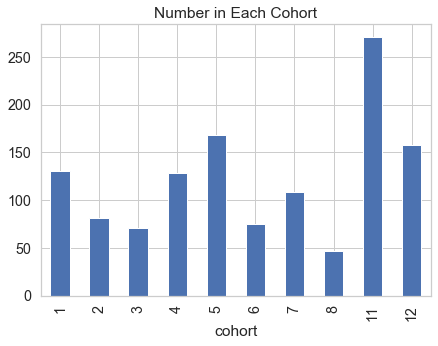

In [42]:
fig, ax = plt.subplots(figsize = (7,5))


_ = with_first.drop_duplicates(subset = 'acct').groupby('cohort').count().acct.plot(kind = 'bar')
_ = plt.title('Number in Each Cohort')

In [43]:
def get_retention_metrics(df):
    """
    This function is used to calculating how many people are coming back for each week after they started using the product. 
    input df: dataframe
    
    output retention_percent: the percentage of users who come back each subsequent week. 
    """
    
    # This ensures that each user is only counted once per week
    df_deduped = df.drop_duplicates(subset = ['acct','WeeksOut'])
    
    retention_df = pd.DataFrame()
    
    for cohort in df_deduped['cohort'].unique():
        
        # This counts the number of people returning each week
        retention = df_deduped[df_deduped['cohort'] == cohort]['WeeksOut'].reset_index().groupby('WeeksOut').count()
    
        # this converts the above metric into a percentage, to make it more consumable
        retention_percent = (retention/retention.loc[0]).rename(mapper = {'index':cohort}, axis = 1)
        
        if retention_df.empty:
            retention_df = retention_percent.reset_index()
            
        else:
            retention_df = retention_df.merge(retention_percent.reset_index(), on = 'WeeksOut', how = 'left')
                
    return retention_df.set_index('WeeksOut')

In [44]:
retention = get_retention_metrics(with_first)

In [45]:
retention[:10]

,1,5,6,11,4,7,12,2,3,8
WeeksOut,,,,,,,,,,
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.761538,0.869048,0.800000,0.793358,0.843750,0.675926,0.677215,0.790123,0.718310,0.489362
2,0.761538,0.869048,0.773333,0.771218,0.820312,0.675926,0.677215,0.777778,0.718310,0.340426
3,0.776923,0.869048,0.773333,0.778598,0.820312,0.675926,0.677215,0.814815,0.718310,NaN
4,0.753846,0.863095,0.786667,0.774908,0.804688,0.657407,0.664557,0.765432,0.732394,NaN
5,0.761538,0.863095,0.786667,0.774908,0.804688,0.657407,0.670886,0.666667,0.718310,NaN
6,0.684615,0.779762,0.733333,0.719557,0.718750,0.370370,0.563291,0.654321,0.619718,NaN
7,0.692308,0.773810,0.733333,0.723247,0.726562,0.175926,0.563291,0.654321,0.619718,NaN
8,0.692308,0.761905,0.720000,0.726937,0.703125,NaN,0.550633,0.666667,0.605634,NaN


People take courses and stick with their courses over the summer more 

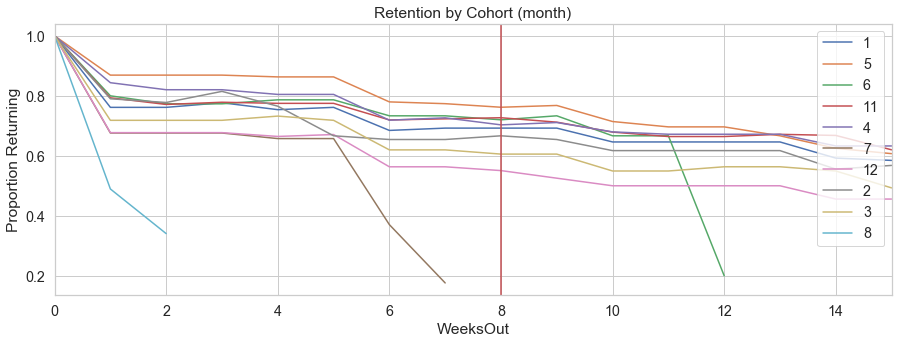

In [46]:

_ = retention[:16].plot(figsize = (15,5))
_ = plt.ylabel('Proportion Returning')
_ = plt.title('Retention by Cohort (month)')
_ = plt.axvline(x = 8, color = 'r')

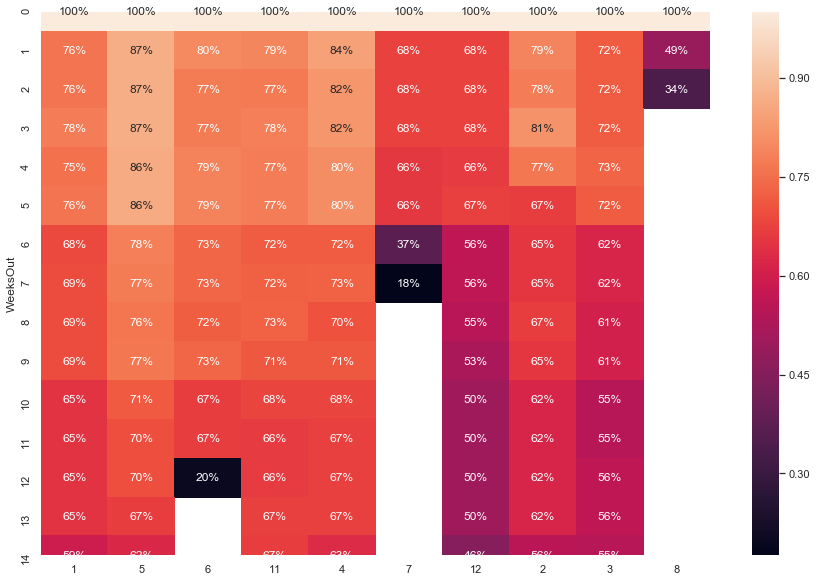

In [47]:
plt.figure(figsize=(15, 10))
sns.set(style='white')

sns.heatmap(retention[:15], mask=retention[:15].isnull(), annot=True, fmt='.0%');

In [48]:
first_weeks_metrics = with_first[with_first['WeeksOut'] <= 3].groupby('acct').sum()\
[['num_courses_visited','total_minutes_visited','lessons_completed','projects_completed']]\
.rename(mapper ={'num_courses_visited':'courses_visited_first_weeks',
                 'total_minutes_visited':'minutes_first_weeks',
                 'lessons_completed':'lessons_completed_first_weeks',
                 'projects_completed':'projects_completed_first_weeks'}, axis = 1).reset_index()

In [49]:
first_weeks = with_first.merge(first_weeks_metrics, on = 'acct')

In [50]:
two_weeks_data = first_weeks.groupby('cohort').mean()[['courses_visited_first_weeks','minutes_first_weeks','lessons_completed_first_weeks','projects_completed_first_weeks']]

In [51]:
two_week_retention = retention.loc[2].reset_index().rename(mapper = {'index':'cohort',2:'TwoWeekRetention'},axis = 1)

In [52]:
two_week_retention

,cohort,TwoWeekRetention
0,1,0.761538
1,5,0.869048
2,6,0.773333
3,11,0.771218
4,4,0.820312
5,7,0.675926
6,12,0.677215
7,2,0.777778
8,3,0.718310
9,8,0.340426


In [53]:
data = two_weeks_data.reset_index().merge(two_week_retention, on = 'cohort').set_index('cohort')

In [54]:
data

,courses_visited_first_weeks,minutes_first_weeks,lessons_completed_first_weeks,projects_completed_first_weeks,TwoWeekRetention
cohort,,,,,
1,14.947528,1264.729460,5.361075,0.010746,0.761538
2,14.757102,1213.153972,5.794809,0.030554,0.777778
3,15.113257,1356.050029,5.683171,0.049368,0.718310
4,9.132408,741.370907,3.656962,0.049583,0.820312
5,14.092041,1153.359062,5.397254,0.000000,0.869048
6,12.496429,1023.887023,6.151915,0.000000,0.773333
7,17.235276,1422.970857,12.068610,0.000000,0.675926
8,5.920086,307.754496,2.818575,0.000000,0.340426
11,15.128926,1191.327568,5.370179,0.054886,0.771218


In [56]:
last_day = with_first.groupby('acct').utc_date.max().reset_index().rename(mapper = {'utc_date':'last_day'},axis = 1)

In [57]:
last_day['last_month'] = pd.DatetimeIndex(last_day['last_day']).month

In [58]:
last_day

,acct,last_day,last_month
0,0,2015-08-27,8
1,1,2015-08-27,8
2,2,2015-08-27,8
3,3,2015-08-27,8
4,4,2015-08-27,8
...,...,...,...
1232,1300,2014-11-15,11
1233,1301,2015-04-03,4
1234,1302,2015-08-24,8
1235,1303,2015-04-20,4


In [59]:
with_firstlast = first_weeks.merge(last_day, on = 'acct')

In [60]:
with_firstlast

,acct,utc_date,num_courses_visited,total_minutes_visited,lessons_completed,projects_completed,year,month,day,first_day,WeeksOut,cohort,courses_visited_first_weeks,minutes_first_weeks,lessons_completed_first_weeks,projects_completed_first_weeks,last_day,last_month
0,0,2015-01-09,1.0,11.679374,0.0,0.0,2015,1,9,2015-01-09,0,1,29.0,2358.045217,10.0,0.0,2015-08-27,8
1,0,2015-01-10,2.0,37.284887,0.0,0.0,2015,1,10,2015-01-09,0,1,29.0,2358.045217,10.0,0.0,2015-08-27,8
2,0,2015-01-11,2.0,53.633746,0.0,0.0,2015,1,11,2015-01-09,0,1,29.0,2358.045217,10.0,0.0,2015-08-27,8
3,0,2015-01-12,1.0,33.489270,0.0,0.0,2015,1,12,2015-01-09,0,1,29.0,2358.045217,10.0,0.0,2015-08-27,8
4,0,2015-01-13,1.0,64.779678,0.0,0.0,2015,1,13,2015-01-09,0,1,29.0,2358.045217,10.0,0.0,2015-08-27,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136235,1305,2015-06-14,0.0,0.000000,0.0,0.0,2015,6,14,2015-05-12,4,5,3.0,19.845701,0.0,0.0,2015-06-18,6
136236,1305,2015-06-15,0.0,0.000000,0.0,0.0,2015,6,15,2015-05-12,4,5,3.0,19.845701,0.0,0.0,2015-06-18,6
136237,1305,2015-06-16,1.0,2.720136,0.0,0.0,2015,6,16,2015-05-12,5,5,3.0,19.845701,0.0,0.0,2015-06-18,6
136238,1305,2015-06-17,0.0,0.000000,0.0,0.0,2015,6,17,2015-05-12,5,5,3.0,19.845701,0.0,0.0,2015-06-18,6


In [61]:
cutoff = datetime.timedelta(days = 60)

In [62]:
def permutations(data_1, data_2):
    """
    This function takes the two arrays of data and shuffles the data into two arrays with the same lengths of the original two  
    """
    
    data = np.concatenate((data_1, data_2))
    perms = np.random.choice(data, len(data), replace = True)
    perm_team1 = perms[:len(data_1)]
    perm_team2 = perms[len(data_1):]
    
    return perm_team1, perm_team2

In [63]:
def bootstrap_means(data_1, data_2, size):
    """
    This function uses the "permutations" function to generate a given amount of cases, where the mean between the 
    two arrays are calculated each time. 
    """
    
    boots = np.empty(size)
    for i in range(size):
        perm_team1, perm_team2 = permutations(data_1, data_2)
        boots[i] = np.mean(perm_team1) - np.mean(perm_team2)
    return boots

In [64]:
def bootstrap_props(data_1, data_2, size):
    """
    This function uses the "permutations" function to generate a given amount of cases, where the proportions of the 
    two arrays are calculated each time. 
    """
    boots = np.empty(size)
    for i in range(size):
        perm_team1, perm_team2 = permutations(data_1, data_2)
        boots[i] = perm_team1.sum()/len(perm_team1) - perm_team2.sum()/len(perm_team2)
    return boots

In [65]:
def calculate_p(df1, df2, col, size, test):
    data1 = df1[col]
    data2 = df2[col]
    
    if test == 'mean':
        emp = data1.mean() - data2.mean()
        theo = bootstrap_means(data1, data2, size)
        
        p = np.sum(theo >= emp) / float(len(theo))
        
    elif test == 'prop':
        
        emp = data1.sum()/len(data1) - data2.sum()/len(data2)
        total = pd.concat([data1, data2], axis = 0)
        
        total_prop = total.sum()/len(total)
        ste = np.sqrt(total_prop*(1-total_prop)*((1/len(data1)) + (1/len(data2))))
        
        theo = emp/ste
    
        p = stats.norm.sf(abs(theo))
    
    return p, theo, emp

## Test 1: Cohort 5 has some difference in their usage within the first 2 weeks that could lead to higher retention.

We've seen that cohort 5, the cohort that began their use of the product in May, has a higher retention than those in other cohorts. I want to see if their average usage of products within the first 2 weeks differs at all from the other cohorts. 


For this, I will perform a one-tailed experiment to determine statistical significance. I will perform statistical significance testing for *each of the numerical columns* to see which one could have statistical significance.

$\mu_{5}$ = Average number of times people in cohort 5 performed the event within the first 2 weeks.

$\mu_{not5}$ = Average number of times people not in cohort 5 performed the event within the first 2 weeks.

$H_0$: $\mu_{5} \leq \mu_{not5}$

$H_a$: $\mu_{5} > \mu_{not5}$

Confidence level $\alpha = 0.05$, meaning, if P < $\alpha$, then we can reject the null hypothesis, that the mean between cohort 5 and other cohorts are different, and are actually the same. 

In [66]:
unique = with_firstlast.drop_duplicates(subset = 'acct')

In [67]:
cohort5 = unique[unique['cohort'] == 5]
not_cohort5 = unique[unique['cohort'] != 5]


In [68]:
('courses_visited', calculate_p(cohort5, not_cohort5, 'courses_visited_first_weeks', 10000, 'mean')[0])


('courses_visited', 0.0277)

In [69]:
('lessons_completed', calculate_p(cohort5, not_cohort5, 'lessons_completed_first_weeks', 10000, 'mean')[0])


('lessons_completed', 0.2369)

In [70]:
emp_lessons_diff = calculate_p(cohort5, not_cohort5, 'lessons_completed_first_weeks', 10000, 'mean')[2]

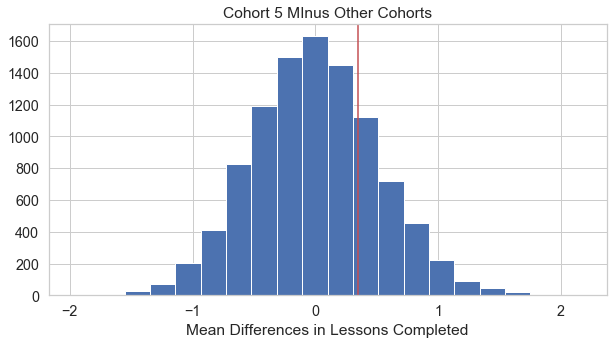

In [71]:
sns.set(font_scale = 1.3, style = 'whitegrid')

fig, ax = plt.subplots(figsize = (10,5))

_ = plt.hist(calculate_p(cohort5, not_cohort5, 'lessons_completed_first_weeks', 10000, 'mean')[1], bins = 20)
_ = plt.title('Cohort 5 MInus Other Cohorts')
_ = plt.axvline(x = emp_lessons_diff, color = 'r')
_ = plt.xlabel('Mean Differences in Lessons Completed')

In [72]:
('projects_completed', calculate_p(cohort5, not_cohort5, 'projects_completed_first_weeks', 10000, 'mean')[0])


('projects_completed', 0.9917)

In [73]:
('minutes', calculate_p(cohort5, not_cohort5, 'minutes_first_weeks', 10000, 'mean')[0])

('minutes', 0.053)

In [74]:
emp_minutes_diff = calculate_p(cohort5, not_cohort5, 'minutes_first_weeks', 10000, 'mean')[2]

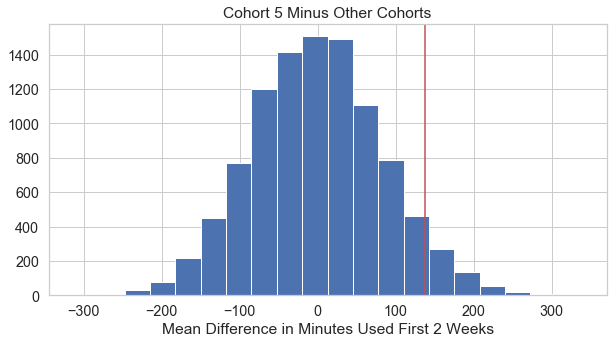

In [75]:
sns.set(font_scale = 1.3, style = 'whitegrid')

fig, ax = plt.subplots(figsize = (10,5))

_ = plt.hist(calculate_p(cohort5, not_cohort5, 'minutes_first_weeks', 10000, 'mean')[1], bins = 20)
_ = plt.title('Cohort 5 Minus Other Cohorts')
_ = plt.axvline(x = emp_minutes_diff, color = 'r')
_ = plt.xlabel('Mean Difference in Minutes Used First 2 Weeks')

In [76]:
emp_visited_diff = calculate_p(cohort5, not_cohort5, 'courses_visited_first_weeks', 10000, 'mean')[2]

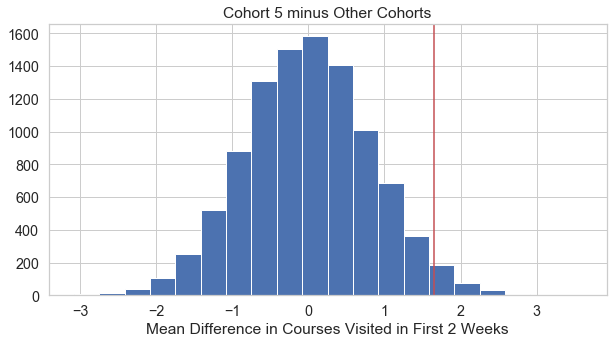

In [77]:
sns.set(font_scale = 1.3, style = 'whitegrid')

fig, ax = plt.subplots(figsize = (10,5))

_ = plt.hist(calculate_p(cohort5, not_cohort5, 'courses_visited_first_weeks', 10000, 'mean')[1], bins = 20)
_ = plt.title('Cohort 5 minus Other Cohorts')
_ = plt.axvline(x = emp_visited_diff, color = 'r')
_ = plt.xlabel('Mean Difference in Courses Visited in First 2 Weeks')

Based on the above, you can see that the two that have statistical significance are number of projects minutes spent on Udacity and the number of lessons viewed by the user. 

The number of lessons viewed was surprising to me. 

# Doing the same thing for December (lowest retention)

In [78]:
cohort12 = unique[unique['cohort'] == 12]
not_cohort12 = unique[unique['cohort'] != 12]

In [79]:
len(cohort12), len(not_cohort12)

(158, 1079)

In [80]:
visited12 = calculate_p(not_cohort12, cohort12, 'courses_visited_first_weeks', 10000, 'mean')
visited12[0]

0.0

In [81]:
visited12[2]

2.9738682089604778

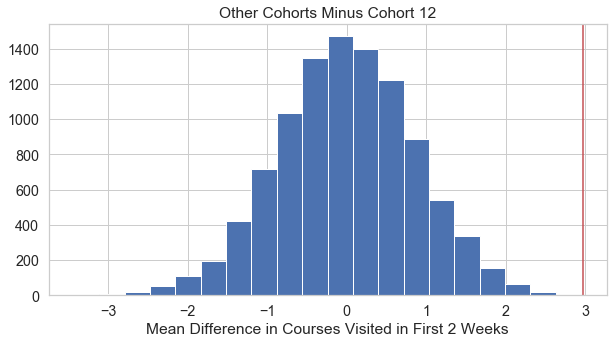

In [82]:
sns.set(font_scale = 1.3, style = 'whitegrid')

fig, ax = plt.subplots(figsize = (10,5))

_ = plt.hist(visited12[1], bins = 20)
_ = plt.title('Other Cohorts Minus Cohort 12')
_ = plt.axvline(x = visited12[2], color = 'r')
_ = plt.xlabel('Mean Difference in Courses Visited in First 2 Weeks')

In [83]:
minutes12 = calculate_p(not_cohort12, cohort12, 'minutes_first_weeks', 10000, 'mean')
minutes12[0]

0.0044

In [84]:
minutes12[2]

216.22591643839462

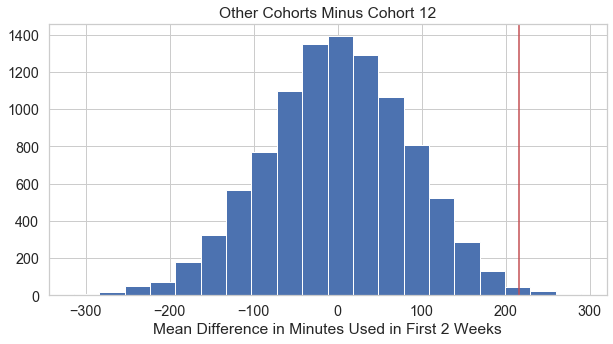

In [85]:
sns.set(font_scale = 1.3, style = 'whitegrid')

fig, ax = plt.subplots(figsize = (10,5))

_ = plt.hist(minutes12[1], bins = 20)
_ = plt.title('Other Cohorts Minus Cohort 12')
_ = plt.axvline(x = minutes12[2], color = 'r')
_ = plt.xlabel('Mean Difference in Minutes Used in First 2 Weeks')

In [86]:
lessons12 = calculate_p(not_cohort12, cohort12, 'lessons_completed_first_weeks', 10000, 'mean')
lessons12[0]

0.0006

In [87]:
lessons12[2]

1.5461456341431936

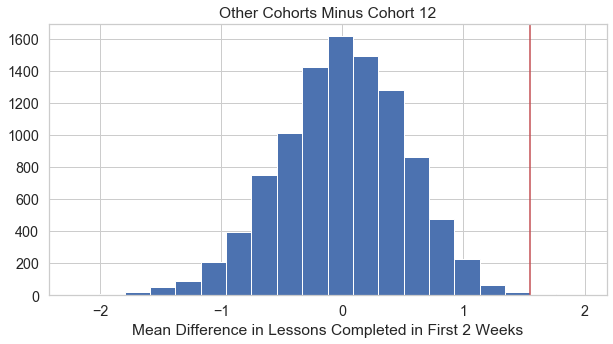

In [88]:
sns.set(font_scale = 1.3, style = 'whitegrid')

fig, ax = plt.subplots(figsize = (10,5))

_ = plt.hist(lessons12[1], bins = 20)
_ = plt.title('Other Cohorts Minus Cohort 12')
_ = plt.axvline(x = lessons12[2], color = 'r')
_ = plt.xlabel('Mean Difference in Lessons Completed in First 2 Weeks')

In [89]:
projects12  = calculate_p(not_cohort12, cohort12, 'projects_completed_first_weeks', 10000, 'mean')
projects12[0]

0.6203


## Test 2: People who stop using Udacity within 2 months view fewer lessons in their first two weeks than people who continue using Udacity for longer than 2 months. 

My hypothesis, based on preliminary evidence in the data, is that the more viewed lessons done, then the more likely it is that you are retained. In order to see if this is true, I will perform a hypothesis that compares the number of the number of completed tests between people who use Udacity for longer than those who use it for shorter. 

To find the "shorter", I will look at those with a maximum date that is less than 2 months away from the minimum date (an average course is 3 months on Udacity, so that means they didn't complete one).

Because I was not provided with the true start dates of these Udacity users, and the data cuts off in August 2015, I will only include those who have a `first_day` in November or a `last_day` in August if their time using Udacity is greater than 2 months. 

For this, I will perform a one-tailed experiment to determine statistical significance. 

$\mu_{short}$ = Mean Number of Viewed Lessons in first two weeks for shorter users

$\mu_{long}$ = Mean Number of Viewed Lessons in first two weeks for longer users

$H_0$: $\mu_{long} - \mu_{short} <= 0$

$H_a$: $\mu_{long} - \mu_{short} > 0$

Confidence level $\alpha = 0.05$, meaning, if P < $\alpha$, then we can reject the null hypothesis that the mean number of viewed lessons within the first two weeks of those who drop out is lower than it is for everyone else. 

In [90]:
cutoff = datetime.timedelta(days = 60)

In [91]:
with_firstlast.acct.nunique()

1237

In [92]:
# group of people who started using the product between December and June.
# Can't include July or August because we don't know if they reached 2 months

middle_start = with_firstlast[(with_firstlast['cohort'] != 11) & (~with_firstlast['last_month'].isin([7,8]))]\
[['acct','first_day','last_day','lessons_completed_first_weeks','projects_completed_first_weeks','minutes_first_weeks','courses_visited_first_weeks']].drop_duplicates()

middle_start.head()

,acct,first_day,last_day,lessons_completed_first_weeks,projects_completed_first_weeks,minutes_first_weeks,courses_visited_first_weeks
820,5,2015-01-07,2015-04-15,6.0,0.0,2018.321199,25.0
3547,24,2014-12-03,2015-06-09,9.0,0.0,1820.406922,13.0
6969,43,2014-12-08,2015-03-29,1.0,0.0,645.210597,10.0
8527,52,2014-12-07,2015-03-13,14.0,0.0,2021.592037,14.0
10616,64,2014-12-06,2015-04-12,13.0,1.0,876.330490,11.0


In [93]:
# people who started between December and June who stopped shorter than 2 months.

short = middle_start[(middle_start['last_day'] - middle_start['first_day']) < cutoff]

len(short)

235

In [94]:
# people who started between December and June who used more than 2 months.

long = middle_start[(middle_start['last_day'] - middle_start['first_day']) > cutoff]

len(long)

87

In [95]:
# people who started in November, July, or August who used longer than 2 months. 
# These can be included because it doesn't matter when they actually started. What matters is their length of use

november_august = with_firstlast[(with_firstlast['cohort'] == 11) | (with_firstlast['last_month'].isin([7,8]))]\
[['acct','first_day','last_day','lessons_completed_first_weeks','projects_completed_first_weeks','minutes_first_weeks','courses_visited_first_weeks']].drop_duplicates()

long_nov_aug = november_august[(november_august['last_day'] - november_august['first_day']) > cutoff]

len(long_nov_aug)


689

In [96]:
long_total = pd.concat([long,long_nov_aug], axis = 0)

len(long_total)

776

In [97]:
len(long_total) + len(short)

1011

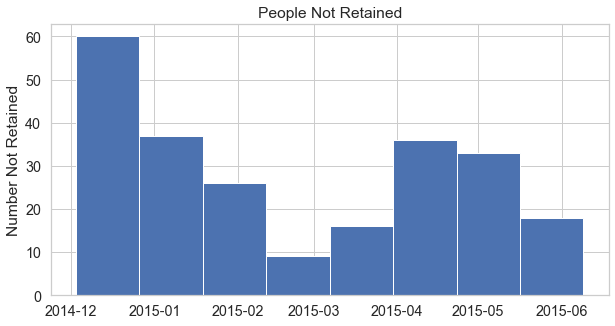

In [98]:
fig, ax = plt.subplots(figsize = (10,5))

_ = plt.hist(short.first_day, bins = 8)

_ = plt.title('People Not Retained')
_ = plt.ylabel('Number Not Retained')

In [99]:
p_long_short_visits = calculate_p(long_total, short, 'courses_visited_first_weeks', 10000, 'mean')

In [100]:
p_long_short_visits[0]

0.0

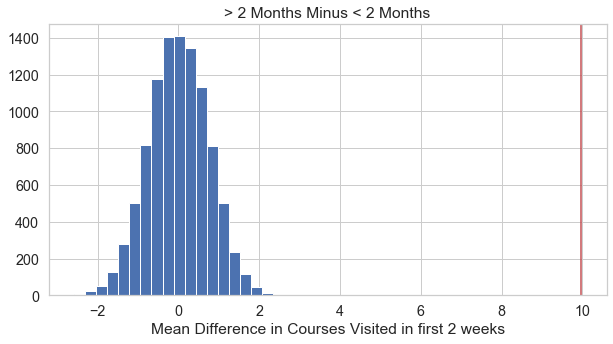

In [101]:
sns.set(font_scale = 1.3, style = 'whitegrid')

fig, ax = plt.subplots(figsize = (10,5))

_ = plt.hist(p_long_short_visits[1], bins = 20)
_ = plt.title('> 2 Months Minus < 2 Months')
_ = plt.axvline(x = p_long_short_visits[2], color = 'r')
_ = plt.xlabel('Mean Difference in Courses Visited in first 2 weeks')

In [102]:
p_long_short_minutes = calculate_p(long_total, short, 'minutes_first_weeks', 10000, 'mean')

In [103]:
p_long_short_minutes[0]

0.0

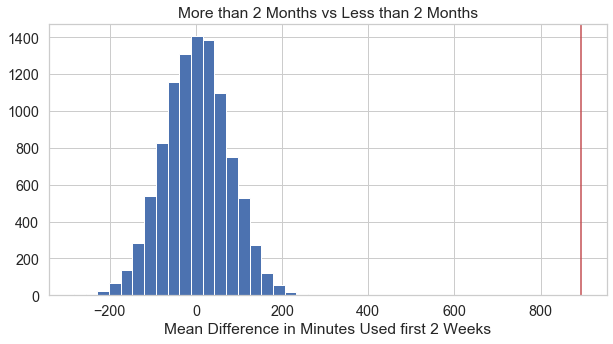

In [104]:
sns.set(font_scale = 1.3, style = 'whitegrid')

fig, ax = plt.subplots(figsize = (10,5))

_ = plt.hist(p_long_short_minutes[1], bins = 20)
_ = plt.title('More than 2 Months vs Less than 2 Months')
_ = plt.axvline(x = p_long_short_minutes[2], color = 'r')
_ = plt.xlabel('Mean Difference in Minutes Used first 2 Weeks')

Using a different test, we get the same results, where it is extremely unlikely for this difference to be by chance. 

## Test 3: Completing at least 1 lesson in your first two weeks will result in a higher chance of continuing usage after 2 months. 

Following through with the above hypothesis test, I want to see if there is a cutoff of number of lessons someone needs to complete to have a stronger likelihood of being retained for two months. 

I will be defining "shorter" the same way, which is less than 2 months. If the user has a lifespan of longer than 2 months, they get a 1, and if not they get a 0. 

Instead of performing a difference in means test, I will be performing a difference in **proportions** test, where I split the data into two proportions, those with 0 lessons completed in their first two weeks and those with at least 1 lesson completed. 

Because I was not provided with the true start dates of these Udacity users, and the data cuts off in August 2015, I will only include those who have a `first_day` in November or a `last_day` in August if their time using Udacity is greater than 2 months. 

For this, I will again perform a one-tailed experiment to determine statistical significance. 

$\rho_{less}$ = Proportion of people with *less than* 1 completed lessons in the first two weeks who stay for more than 2 months

$\rho_{more}$ = Proportion of people with *more than* 1 or 1 completed lessons in the first two weeks who stay for more than 2 months

$H_0$: $\rho_{more} - \rho_{short} <= 0$

$H_a$: $\rho_{more} - \rho_{short} > 0$

Confidence level $\alpha = 0.05$, meaning, if P < $\alpha$, then we can reject the null hypothesis

In [105]:
cutoff = datetime.timedelta(days = 60)

In [106]:
combined = pd.concat([middle_start, long_nov_aug], axis = 0)

In [107]:
combined['retained'] = [1 if x >= cutoff else 0 for x in (combined['last_day'] - combined['first_day'])] 

Of the 1000 users we're observing, 74% still are returning after 2 months. 

In [108]:
combined.retained.sum()/len(combined)

0.7677865612648221

In [109]:
def split_by_usage(df, col, count):
    less_than = df[df[col] <= count]
    more_than = df[df[col] > count]
    
    return less_than, more_than

In [110]:
less_than_visited, more_than_visited = split_by_usage(combined, 'courses_visited_first_weeks', 1)

In [111]:
len(less_than_visited), len(more_than_visited)

(184, 828)

In [116]:
from sklearn.linear_model import LogisticRegression
import statsmodels.discrete.discrete_model as sm

In [117]:
combined.head()

,acct,first_day,last_day,lessons_completed_first_weeks,projects_completed_first_weeks,minutes_first_weeks,courses_visited_first_weeks,retained
820,5,2015-01-07,2015-04-15,6.0,0.0,2018.321199,25.0,1
3547,24,2014-12-03,2015-06-09,9.0,0.0,1820.406922,13.0,1
6969,43,2014-12-08,2015-03-29,1.0,0.0,645.210597,10.0,1
8527,52,2014-12-07,2015-03-13,14.0,0.0,2021.592037,14.0,1
10616,64,2014-12-06,2015-04-12,13.0,1.0,876.330490,11.0,1


In [118]:
combined_random = combined.sample(frac=1)

In [119]:
y = combined_random['retained']
X = combined_random[['courses_visited_first_weeks','minutes_first_weeks','lessons_completed_first_weeks']]

In [120]:
combined_random.retained.sum()/len(combined_random)

0.7677865612648221

In [121]:
clf = LogisticRegression(fit_intercept = False, C = 1e9)#.fit(X[:750],y[:750])

In [122]:
mdl = clf.fit(X[:750], y[:750])

C:\Users\miste\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [123]:
mdl.score(X[751:], y[751:])

0.7701149425287356

In [124]:
y[751:]

68003     1
37422     1
132085    1
14115     1
81371     1
         ..
230       1
34164     1
69637     1
69769     1
13920     1
Name: retained, Length: 261, dtype: int64

In [125]:
import sklearn.metrics as metrics

In [126]:
# 95% of all were predicted 

metrics.recall_score(y[751:], mdl.predict(X[751:]))

0.9512195121951219

In [127]:
# only 78% of positive predictions were correct

metrics.precision_score(y[751:], mdl.predict(X[751:]))

0.7959183673469388

In [129]:
print(metrics.classification_report(y[751:],mdl.predict(X[751:])))

              precision    recall  f1-score   support

           0       0.38      0.11      0.17        56
           1       0.80      0.95      0.87       205

    accuracy                           0.77       261
   macro avg       0.59      0.53      0.52       261
weighted avg       0.71      0.77      0.72       261

